Construction of a simple ANN

In [1]:
import numpy as np

# Step 1: Define the sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 2: Define training data for XOR
# 4 input combinations of binary inputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# XOR truth table
y = np.array([
    [0],
    [1],
    [1],
    [0]
])

# Step 3: Initialize weights and bias
np.random.seed(42)  # for reproducibility
input_size = 2
hidden_size = 2
output_size = 1

# Weights between input and hidden layer
weights_input_hidden = np.random.rand(input_size, hidden_size)
# Weights between hidden and output layer
weights_hidden_output = np.random.rand(hidden_size, output_size)

# Bias terms
bias_hidden = np.random.rand(1, hidden_size)
bias_output = np.random.rand(1, output_size)

# Step 4: Training the ANN
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # === FORWARD PASS ===
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_input)

    # === BACKWARD PASS ===
    error = y - final_output
    output_delta = error * sigmoid_derivative(final_output)

    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # === UPDATE WEIGHTS AND BIASES ===
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # === PRINT ERROR ===
    if epoch % 1000 == 0:
        loss = np.mean(np.abs(error))
        print(f"Epoch {epoch} | Loss: {loss:.4f}")

# Step 5: Final prediction
print("\nFinal predictions after training:")
print(final_output)


Epoch 0 | Loss: 0.4994
Epoch 1000 | Loss: 0.4994
Epoch 2000 | Loss: 0.4954
Epoch 3000 | Loss: 0.4642
Epoch 4000 | Loss: 0.3847
Epoch 5000 | Loss: 0.2268
Epoch 6000 | Loss: 0.1298
Epoch 7000 | Loss: 0.0943
Epoch 8000 | Loss: 0.0764
Epoch 9000 | Loss: 0.0654

Final predictions after training:
[[0.06029012]
 [0.94447222]
 [0.944367  ]
 [0.05997169]]


In [5]:
X = np.array([
    [1, 1],
    [1, 1],
    [1, 0],
    [0, 1]
])
hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_output = sigmoid(hidden_input)

final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_input)

final_output


array([[0.05996465],
       [0.05996465],
       [0.9443732 ],
       [0.9444784 ]])

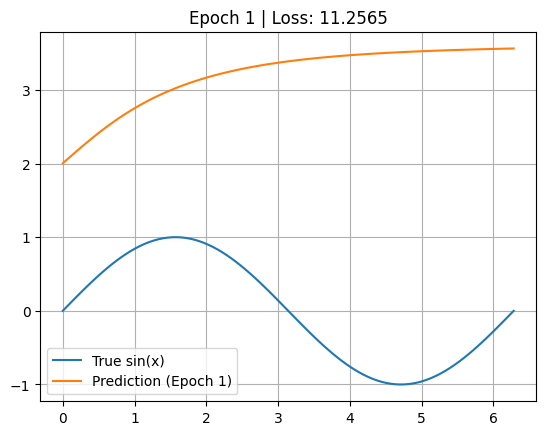

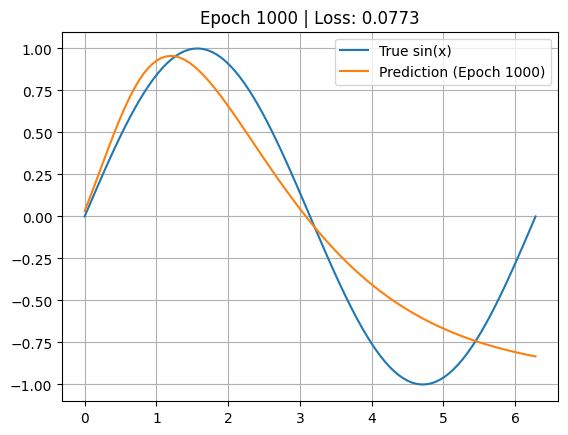

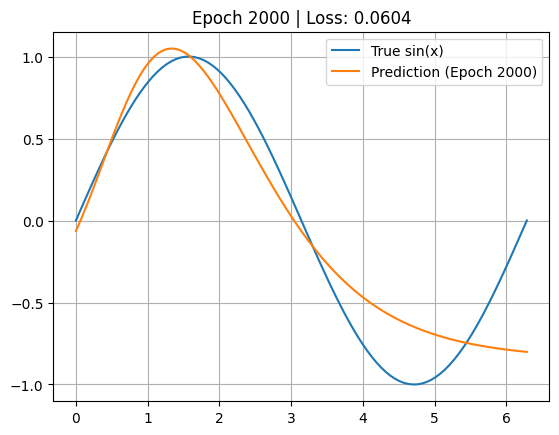

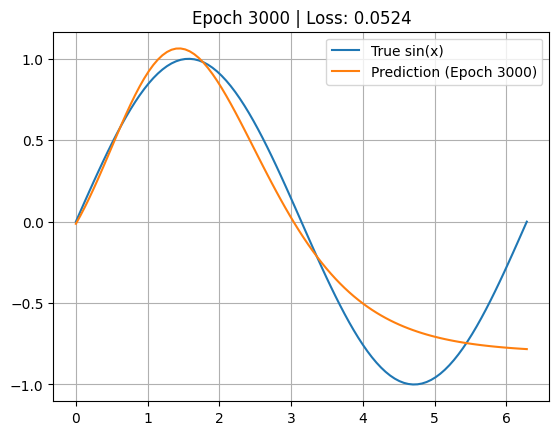

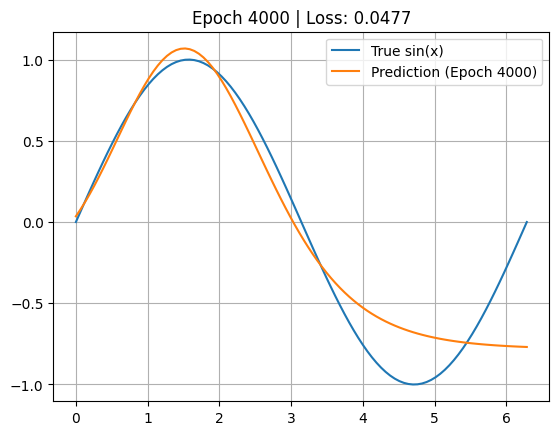

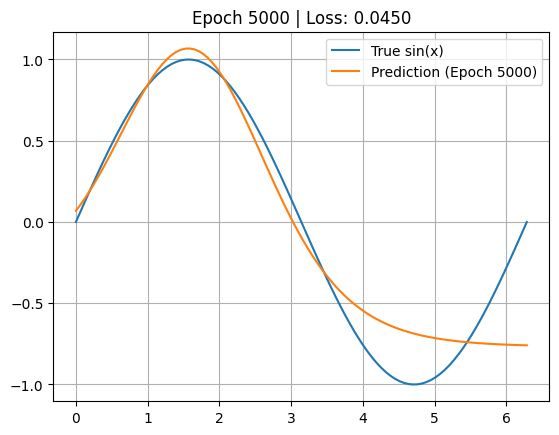

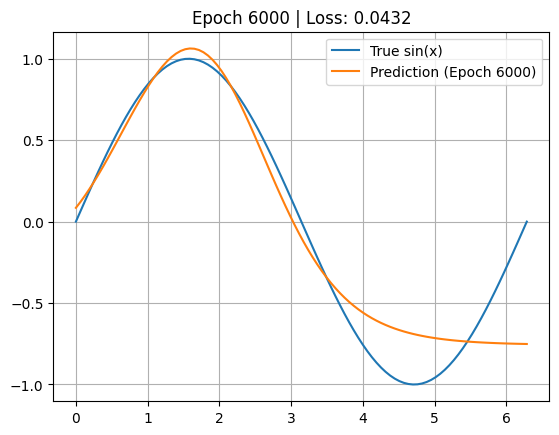

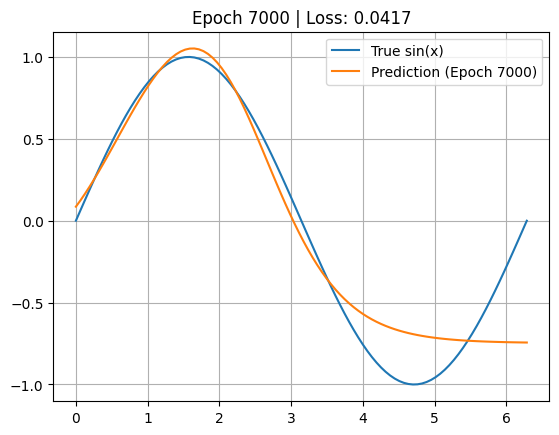

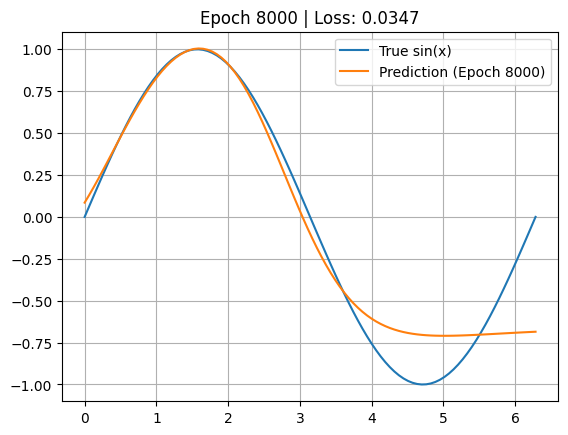

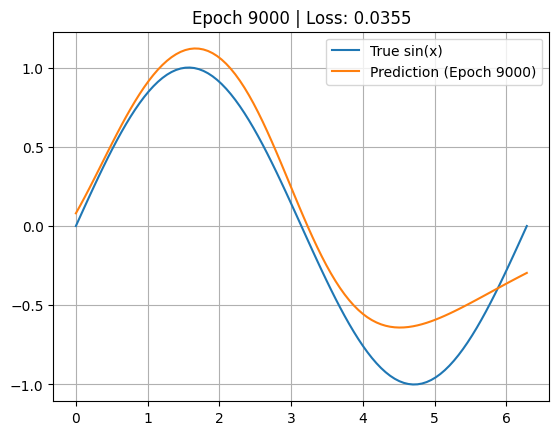

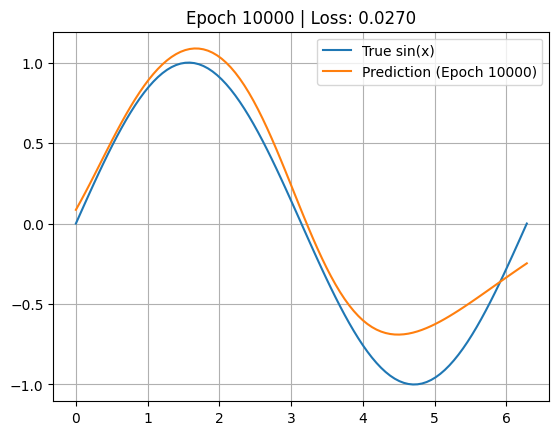

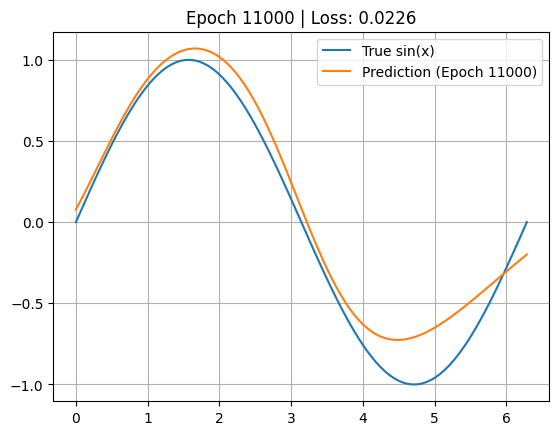

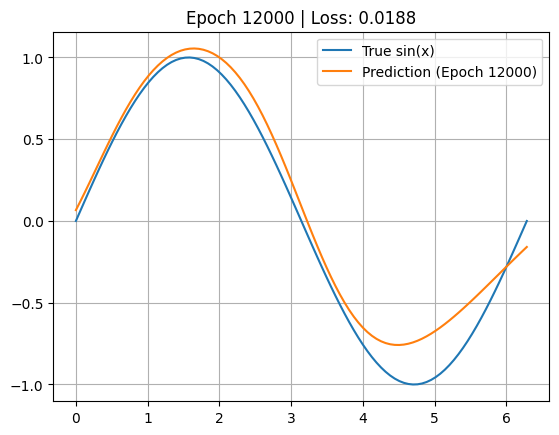

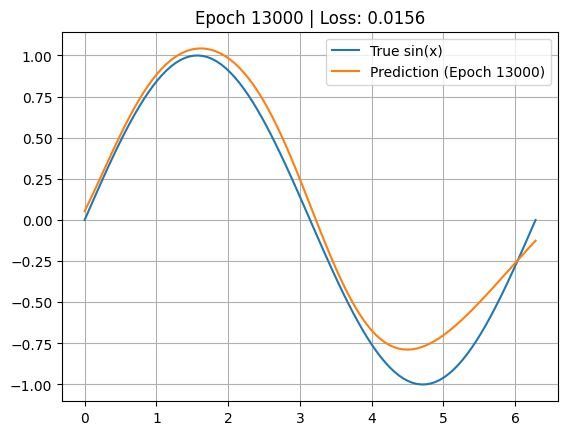

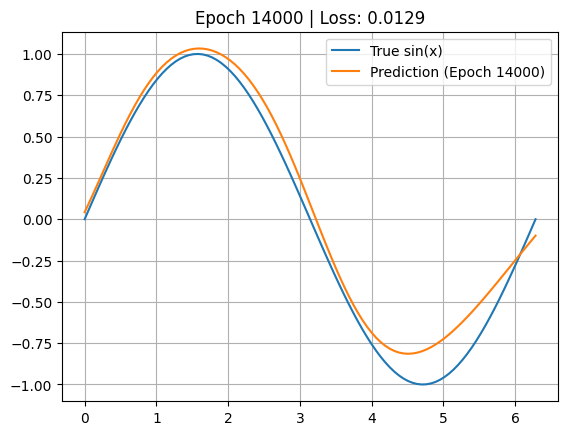

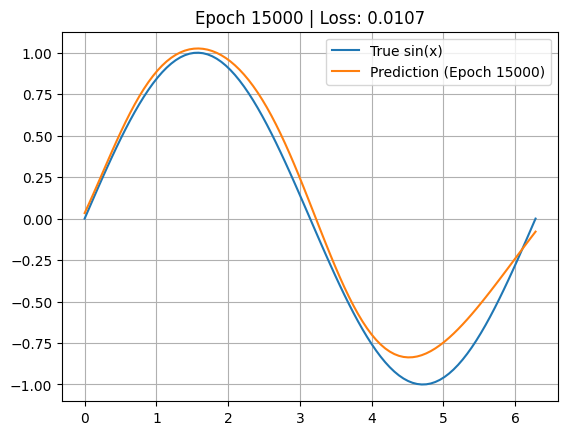

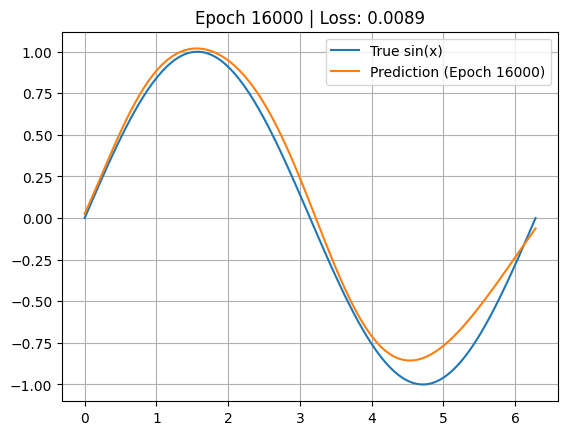

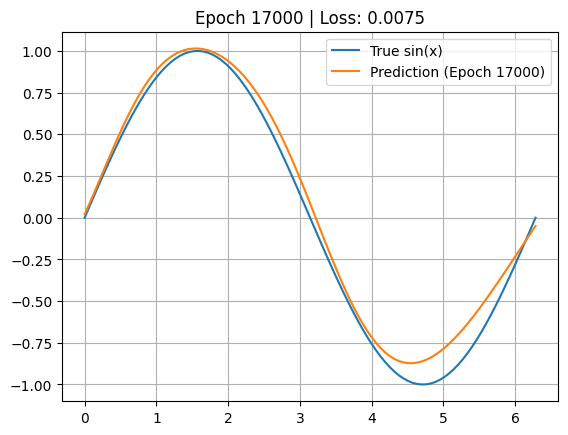

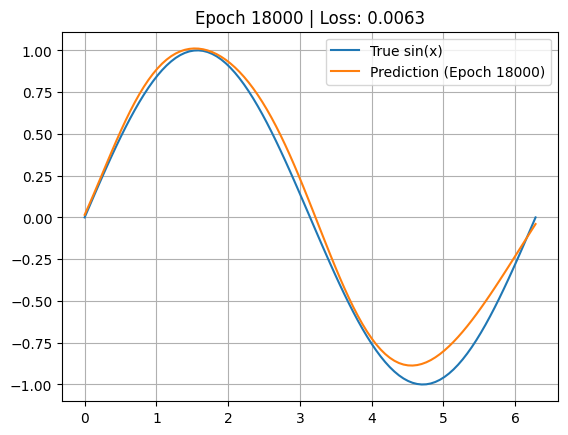

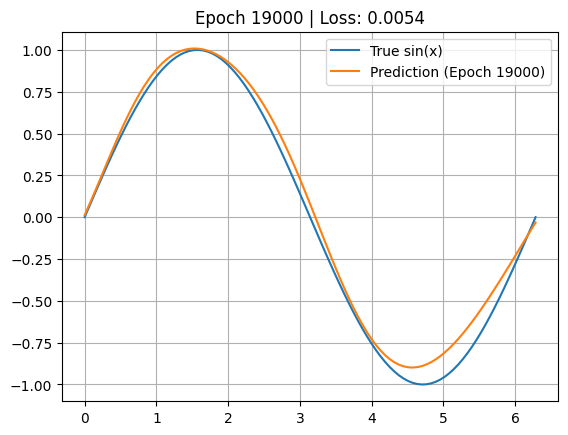

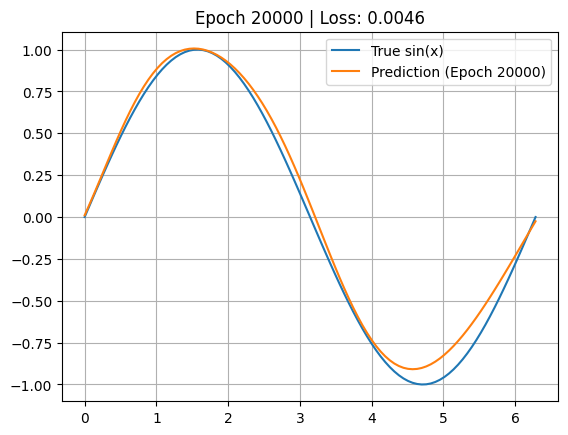

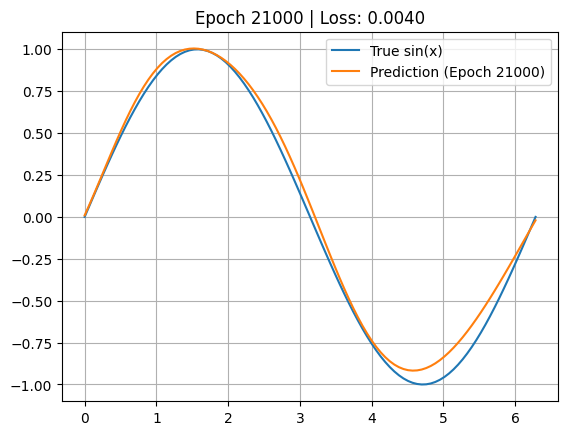

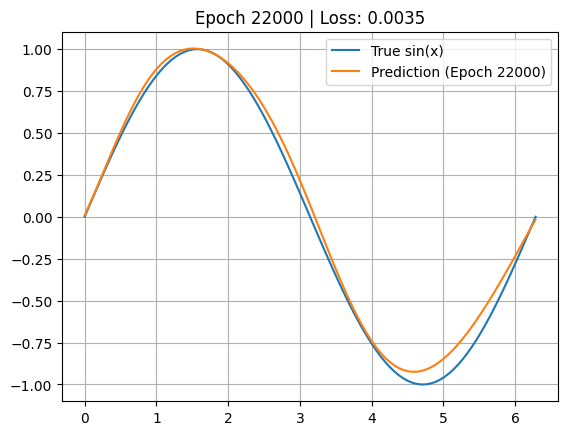

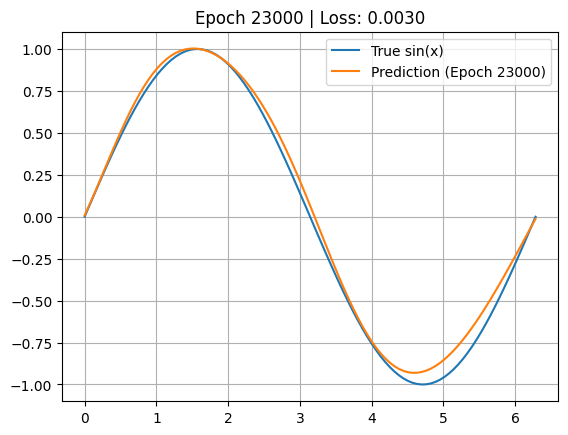

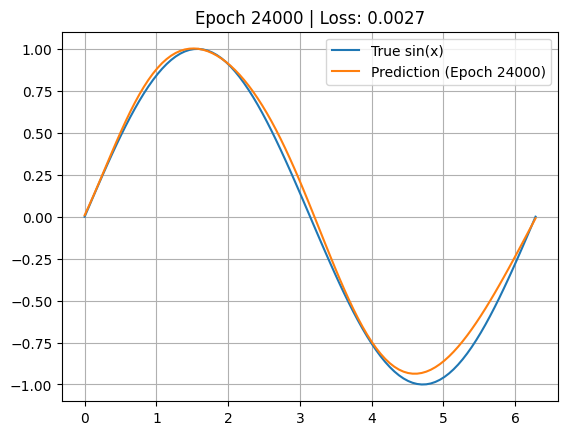

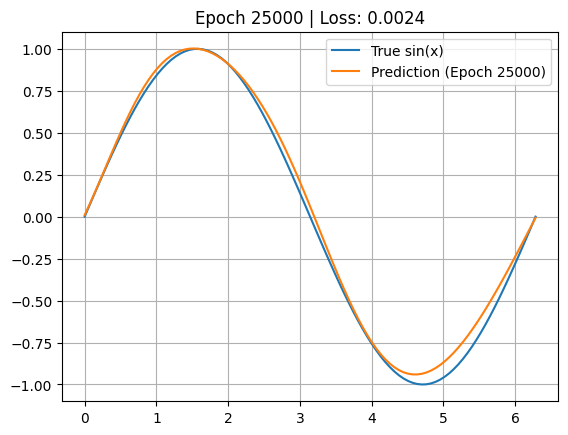

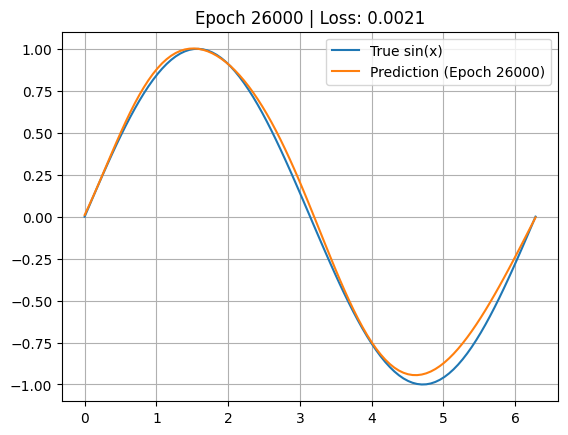

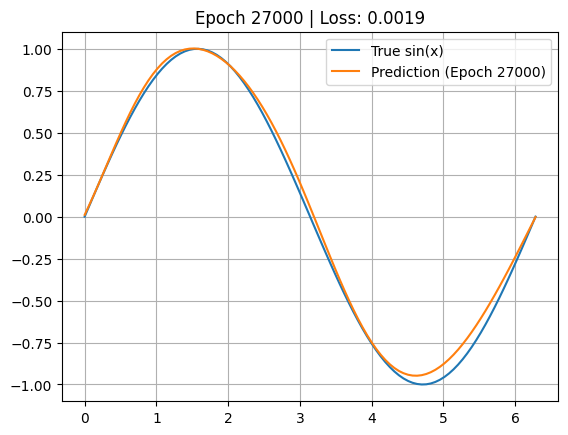

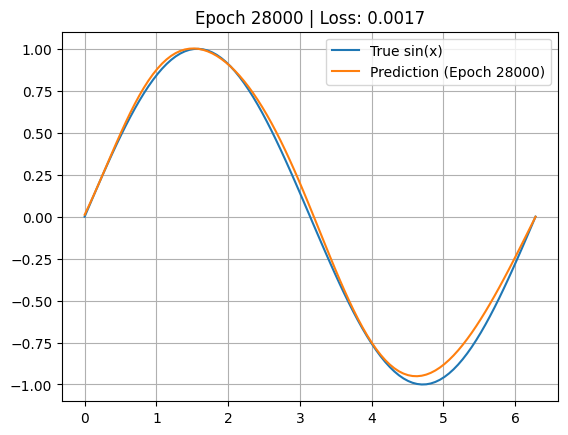

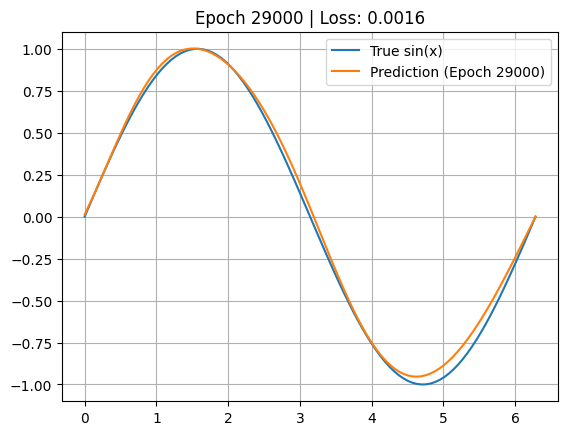

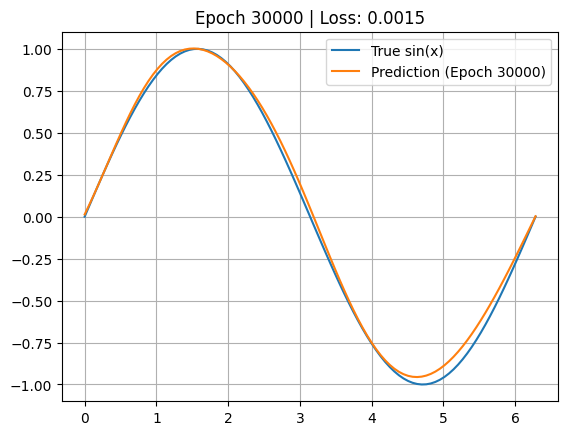

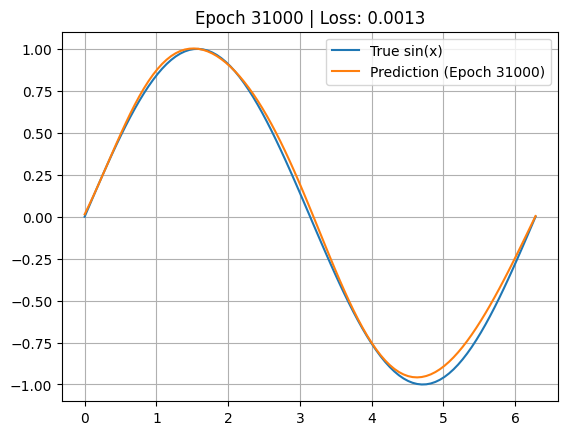

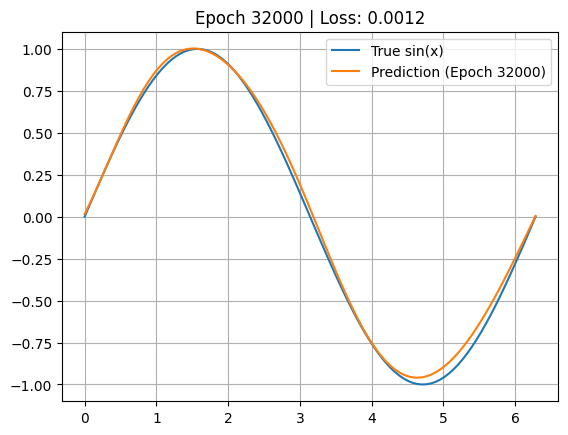

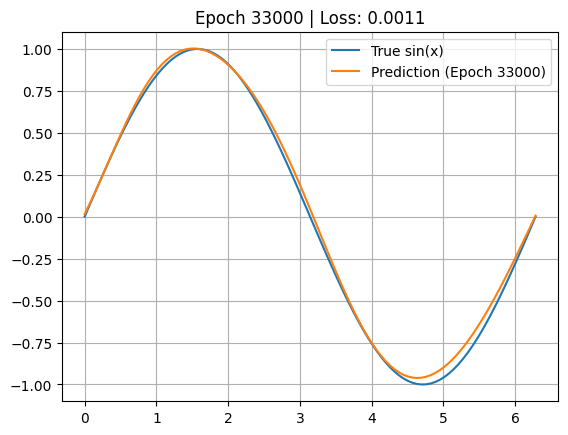

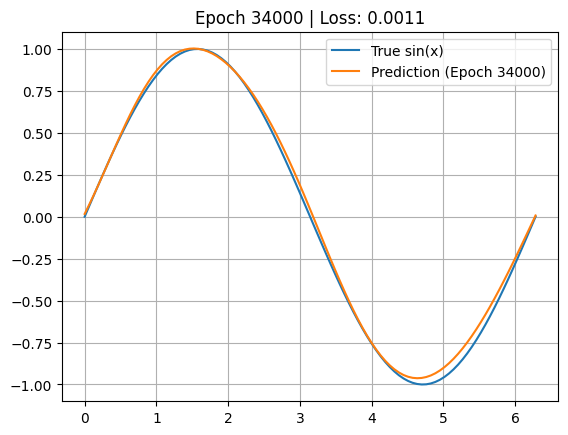

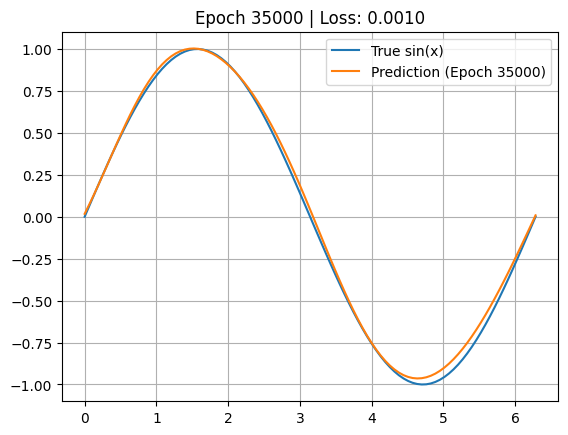

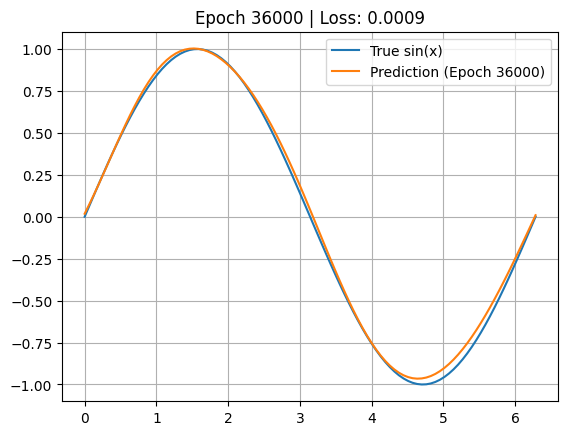

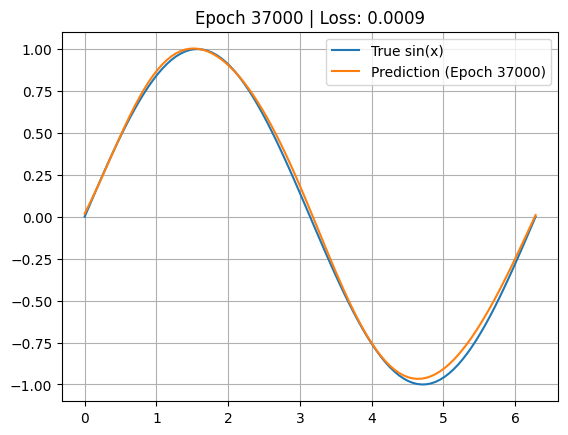

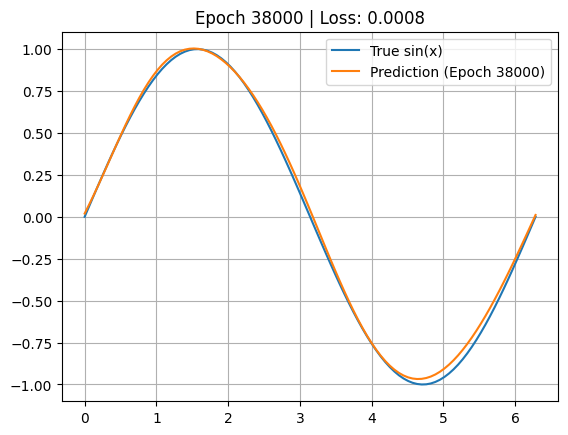

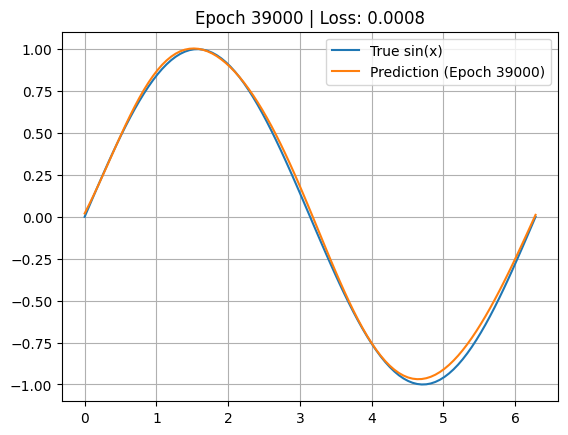

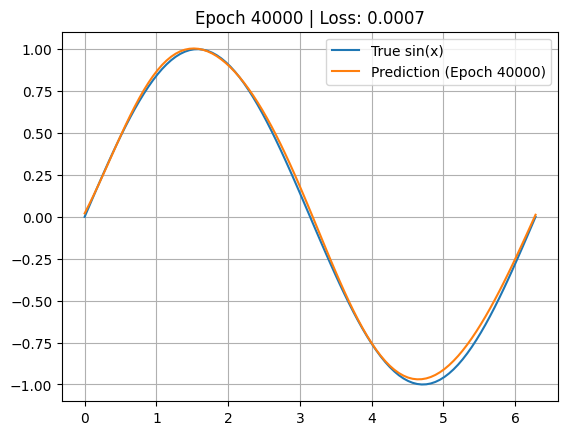

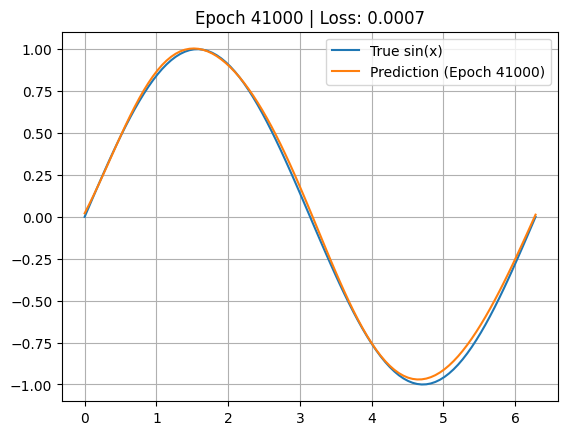

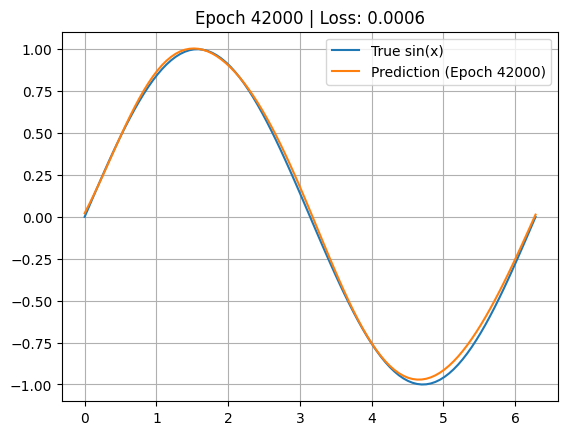

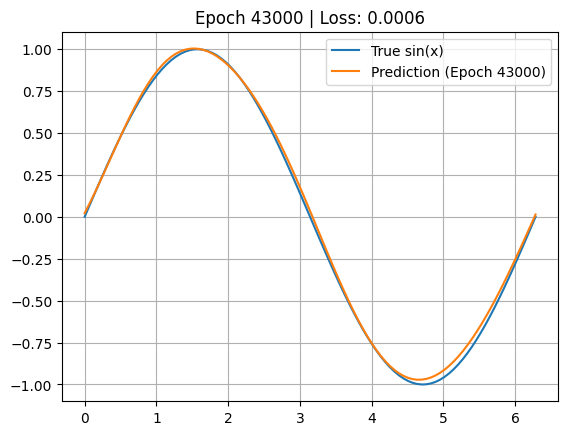

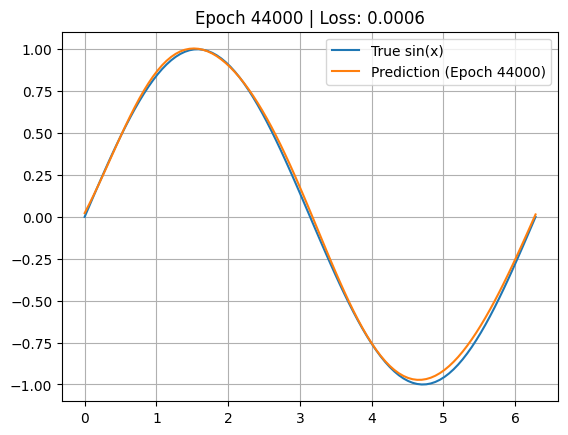

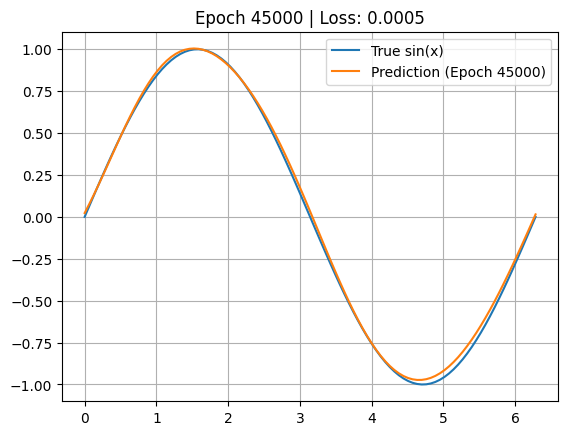

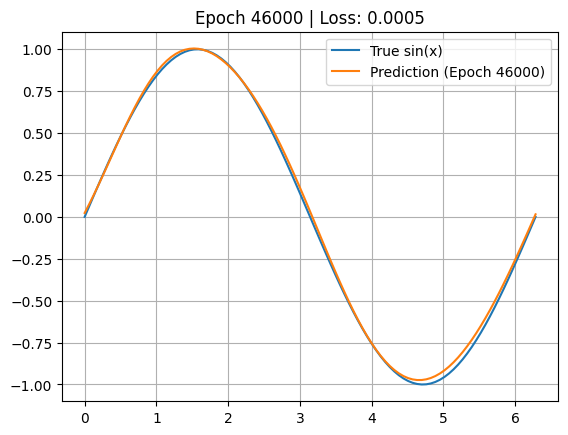

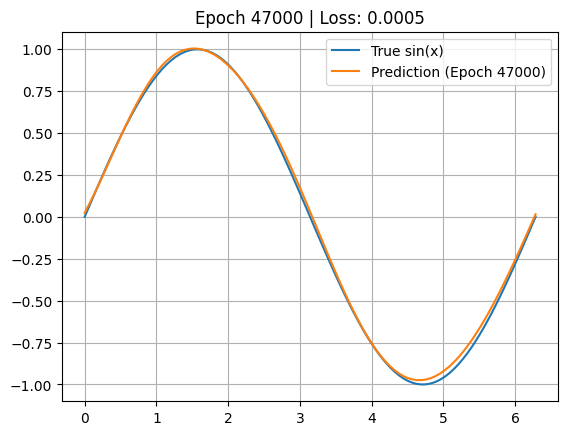

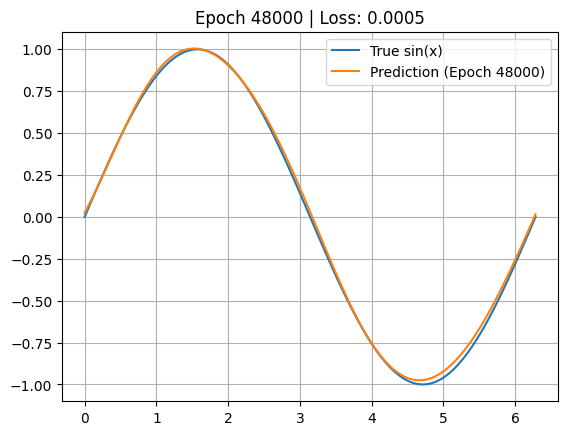

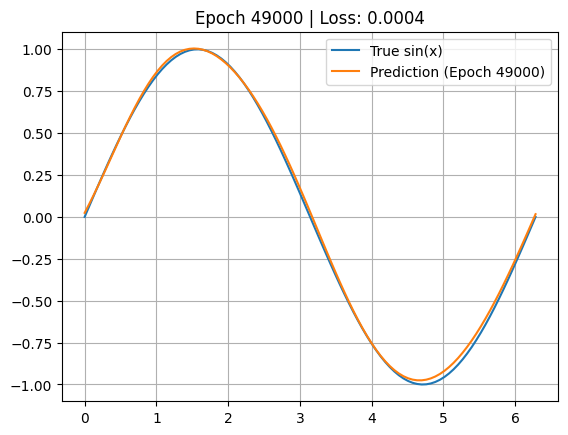

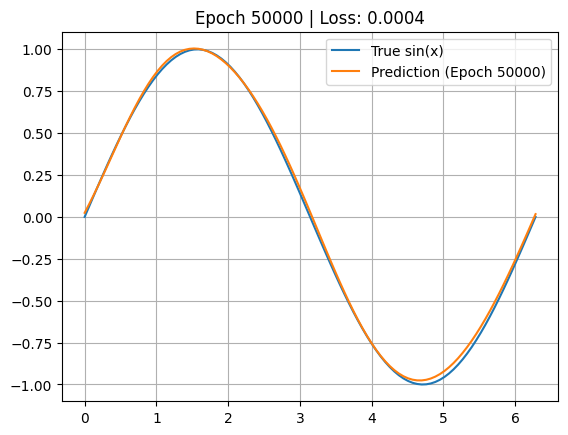

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate training data
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(x)

# 2. Activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 3. Initialize network parameters
input_size = 1
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# 4. Training loop
learning_rate = 0.1
epochs = 50000
plot_interval = 1000

for epoch in range(1, epochs + 1):
    # === FORWARD PASS ===
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, W2) + b2
    output = z2  # No activation on output layer for regression

    # === LOSS ===
    loss = np.mean((y - output)**2)

    # === BACKWARD PASS ===
    d_loss_output = 2 * (output - y) / y.size

    d_W2 = np.dot(a1.T, d_loss_output)
    d_b2 = np.sum(d_loss_output, axis=0, keepdims=True)

    d_a1 = np.dot(d_loss_output, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1)

    d_W1 = np.dot(x.T, d_z1)
    d_b1 = np.sum(d_z1, axis=0, keepdims=True)

    # === UPDATE WEIGHTS ===
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    # === VISUALIZE ===
    if epoch % plot_interval == 0 or epoch == 1:
        plt.figure()
        plt.plot(x, y, label='True sin(x)')
        plt.plot(x, output, label=f'Prediction (Epoch {epoch})')
        plt.title(f"Epoch {epoch} | Loss: {loss:.4f}")
        plt.legend()
        plt.grid()
        plt.show()


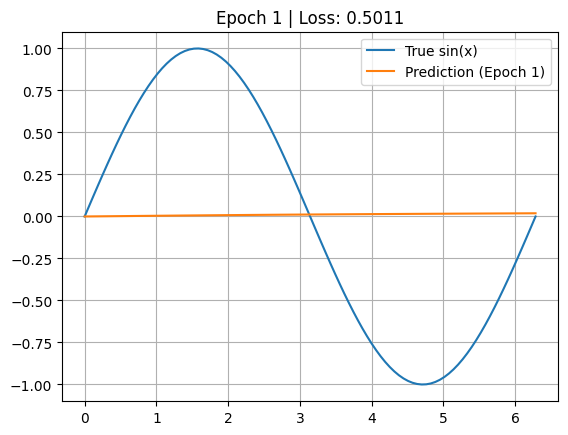

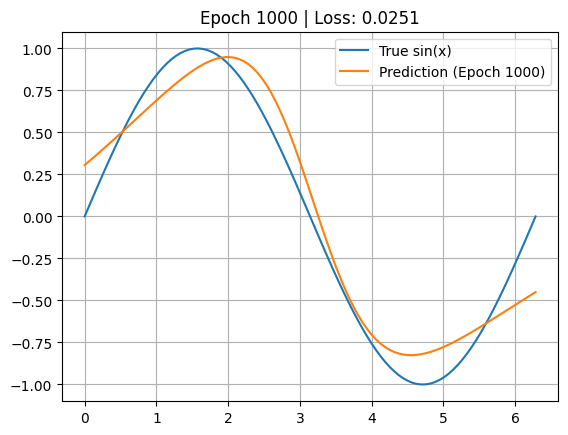

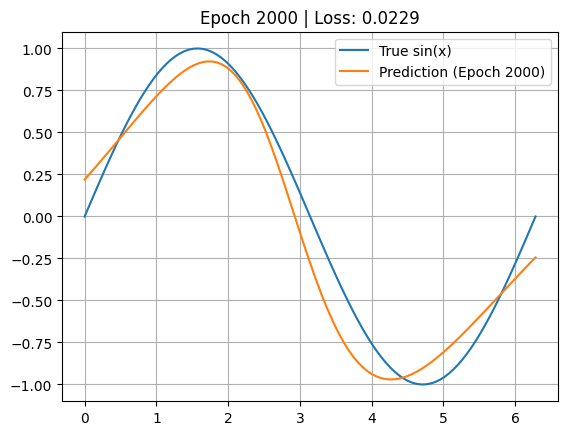

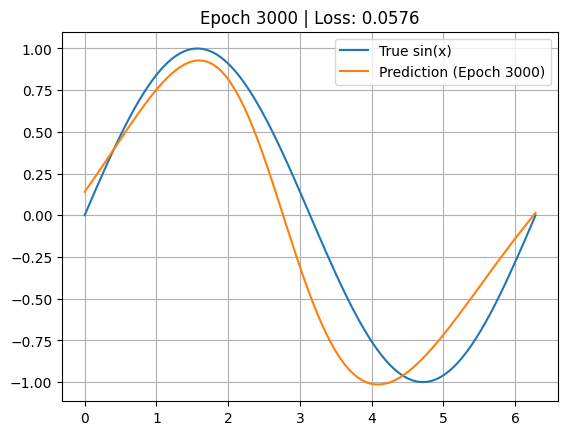

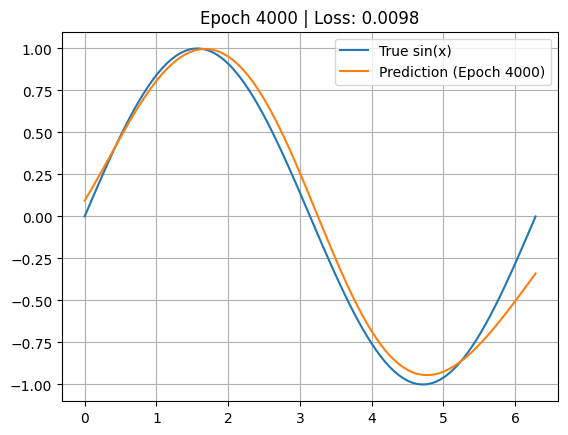

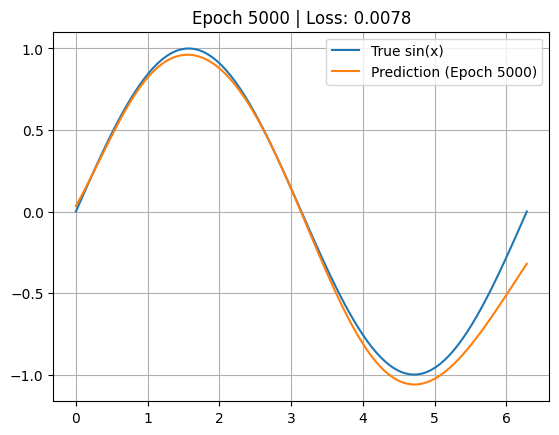

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate training data
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(x)

# 2. Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Optional: try tanh for better performance
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 3. Initialize weights and biases for 2 hidden layers
input_size = 1
hidden1_size = 20
hidden2_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden1_size) * 0.1
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, output_size) * 0.1
b3 = np.zeros((1, output_size))

# 4. Training loop
learning_rate = 0.1
epochs = 5000
plot_interval = 1000

for epoch in range(1, epochs + 1):
    # === FORWARD PASS ===
    z1 = np.dot(x, W1) + b1
    a1 = tanh(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = tanh(z2)

    z3 = np.dot(a2, W3) + b3
    output = z3  # Linear output for regression

    # === LOSS ===
    loss = np.mean((y - output) ** 2)

    # === BACKWARD PASS ===
    d_loss_output = 2 * (output - y) / y.shape[0]  # Mean squared error gradient

    dW3 = np.dot(a2.T, d_loss_output)
    db3 = np.sum(d_loss_output, axis=0, keepdims=True)

    d_a2 = np.dot(d_loss_output, W3.T)
    d_z2 = d_a2 * tanh_derivative(z2)

    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * tanh_derivative(z1)

    dW1 = np.dot(x.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    # === UPDATE ===
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # === VISUALIZATION ===
    if epoch % plot_interval == 0 or epoch == 1:
        plt.figure()
        plt.plot(x, y, label='True sin(x)')
        plt.plot(x, output, label=f'Prediction (Epoch {epoch})')
        plt.title(f"Epoch {epoch} | Loss: {loss:.4f}")
        plt.legend()
        plt.grid(True)
        plt.show()


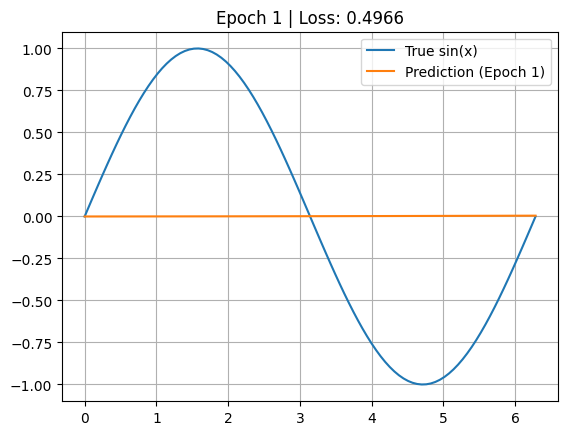

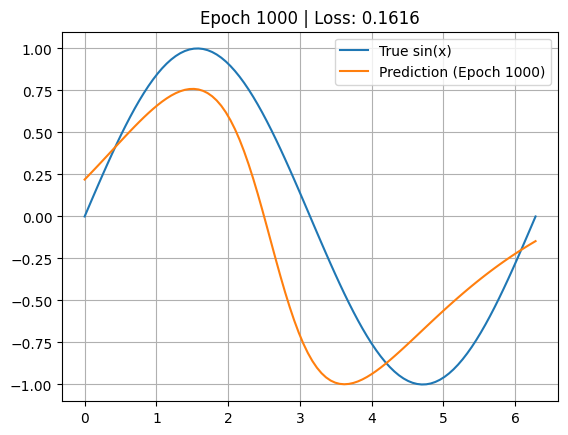

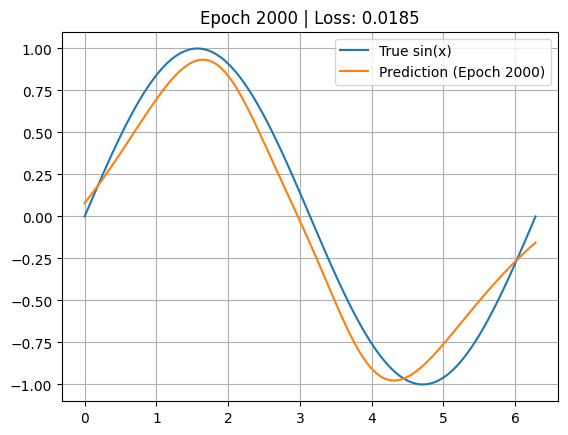

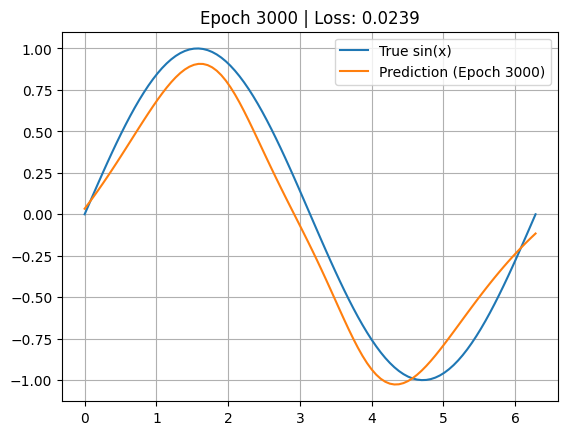

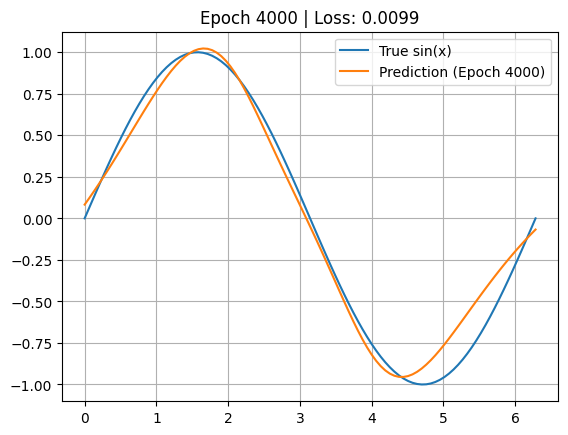

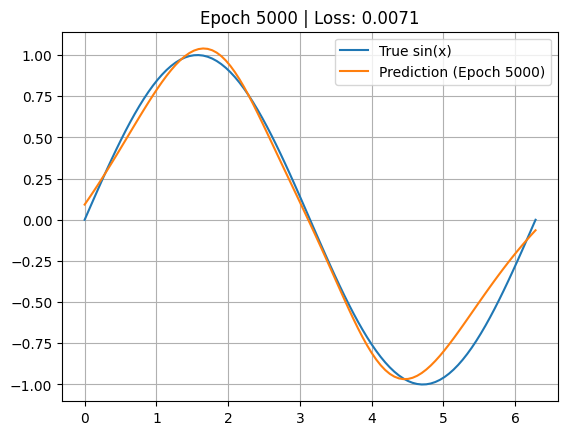

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate training data
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(x)

# 2. Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Optional: try tanh for better performance
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# 3. Initialize weights and biases for 2 hidden layers
input_size = 1
hidden1_size = 20
hidden2_size = 10
hidden3_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden1_size) * 0.1
b1 = np.zeros((1, hidden1_size))

W2 = np.random.randn(hidden1_size, hidden2_size) * 0.1
b2 = np.zeros((1, hidden2_size))

W3 = np.random.randn(hidden2_size, hidden3_size) * 0.1
b3 = np.zeros((1, hidden3_size))

W4 = np.random.randn(hidden3_size, output_size) * 0.1
b4 = np.zeros((1, output_size))

# 4. Training loop
learning_rate = 0.1
epochs = 5000
plot_interval = 1000

for epoch in range(1, epochs + 1):
    # === FORWARD PASS ===
    z1 = np.dot(x, W1) + b1
    a1 = tanh(z1)

    z2 = np.dot(a1, W2) + b2
    a2 = tanh(z2)

    z3 = np.dot(a2, W3) + b3
    a3 = tanh(z3)

    z4 = np.dot(a3, W4) + b4
    output = z4  # Linear output for regression

    # === LOSS ===
    loss = np.mean((y - output) ** 2)

    # === BACKWARD PASS ===
    d_loss_output = 2 * (output - y) / y.shape[0]  # Mean squared error gradient

    dW4 = np.dot(a3.T, d_loss_output)
    db4 = np.sum(d_loss_output, axis=0, keepdims=True)

    d_a3 = np.dot(d_loss_output, W4.T)
    d_z3 = d_a3 * tanh_derivative(z3)

    dW3 = np.dot(a2.T, d_z3)
    db3 = np.sum(d_z3, axis=0, keepdims=True)

    d_a2 = np.dot(d_z3, W3.T)
    d_z2 = d_a2 * tanh_derivative(z2)

    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * tanh_derivative(z1)

    dW1 = np.dot(x.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    # === UPDATE ===
    W4 -= learning_rate * dW4
    b4 -= learning_rate * db4
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # === VISUALIZATION ===
    if epoch % plot_interval == 0 or epoch == 1:
        plt.figure()
        plt.plot(x, y, label='True sin(x)')
        plt.plot(x, output, label=f'Prediction (Epoch {epoch})')
        plt.title(f"Epoch {epoch} | Loss: {loss:.4f}")
        plt.legend()
        plt.grid(True)
        plt.show()


# Another example for regression

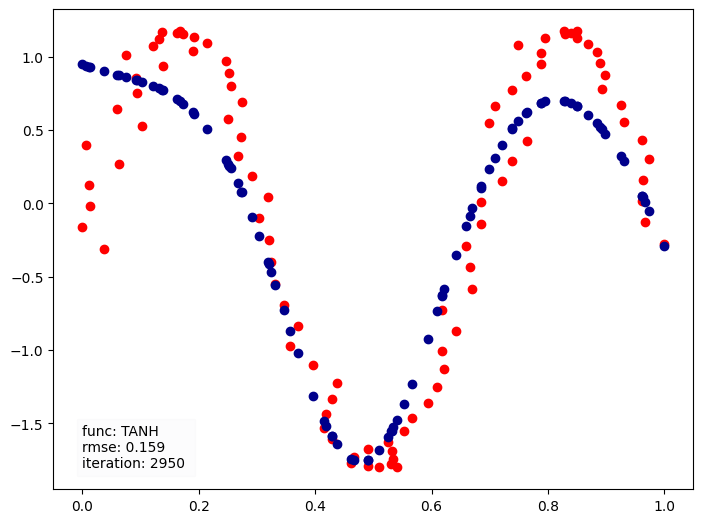

In [16]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import clear_output
import math

# -- Transition functions
def relu(x):
    return (x > 0) * x


def relu_derivative(output):
    return output > 0


def tanh(x):
    return (np.e ** (x) - np.e ** (-x)) / (np.e ** (x) + np.e ** (-x))


def tanh_derivative(x):
    return 1 - tanh(x)

def lrelu(x):
    x = np.where(x > 0, x, x * 0.001)
    return x

def lrelu_derivative(x):
    dx = np.ones_like(x)
    dx[x < 0] = 0.001
    return dx

# choose Transition function
transition_func = tanh
transition_func_derivative =tanh_derivative


# -- Data

# coos (1) or (2) or generate yor own data
np.random.seed(seed=1)

# (1)
# n = 200
# x = np.array(np.array([(1, i + np.random.normal(loc=4, scale=6)) for i in range(0, n)]))
# y = np.array([np.array([i + np.random.normal(loc=0, scale=2, )]) for i in range(0, n)])
# y = (y - y.mean()) ** 2

# (2)
x = np.arange(0,3*np.pi,0.1)   # start,stop,step
y = np.sin(x).reshape(len(x),1)
x = np.array(np.array([(1, i + np.random.normal(loc=0, scale=0.2))for i in x]))

# -- Normalization
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
y = (y - y.mean()) / y.std()

# -- Scaling
x[:, 1] = (x[:, 1] + abs(x[:, 1].min()))
x[:, 1] = x[:, 1] / x[:, 1].max()

# -- Params
# Step size
alpha = 0.01

# Number of iterations
iters = 100000

# Number of nuerons
hidden_size = 20

# -- Weights initiation
# Final_Weights
mu = y.mean()

w2 = np.array([np.random.normal(loc=mu, scale=0.5) for i in range(0, hidden_size)]).reshape(hidden_size, 1)

# First_hidden_weigts
w1 = np.array(np.array([[np.random.normal(loc=mu, scale=0.5)] * hidden_size for i in range(0, x.shape[1])]))

# -- iterate and plot predicted vs actual each 300 iterations
for iteration in range(3000):
    for i in range(len(x)):
        # batch
        layer_0 = x[i:i + 1]

        # - Forward -
        y_hat = transition_func(layer_0 @ w1) @ w2

        # - Backward -
        # Predicted vs actual
        diff = y_hat - y[i:i + 1]

        # w2 gradient
        w2_grad = diff @ transition_func(layer_0 @ w1)

        # w1 gradient
        w1_grad = (diff @ w2.T * transition_func_derivative(layer_0 @ w1)).T @ layer_0

        # update weights
        w2 -= alpha * w2_grad.T
        w1 -= alpha * w1_grad.T

    if iteration % 50 == 0:
        y_pred = transition_func(x @ w1) @ w2
        n = len(x)
        e = sum((y_pred - y) ** 2 / n)[0]

        clear_output(wait=True)
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(x=x[:, 1], y=y, color='r')
        ax.scatter(x[:, 1], y_pred, color='darkblue')
        ax.text(x.min(),y.min(), f'func: TANH\nrmse: {e:.3}\niteration: {iteration} ',bbox=dict(facecolor='darkblue', alpha=0.01))

        plt.show()


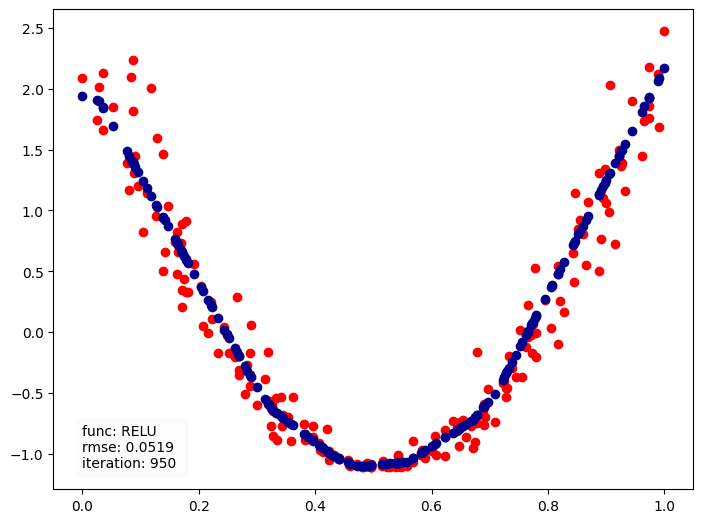

In [24]:
# Lets try it with RELU
transition_func = relu
transition_func_derivative =relu_derivative

# -- Data

# coos (1) or (2) or generate yor own data
np.random.seed(seed=1)

# (1)
n = 200
x = np.array(np.array([(1, i + np.random.normal(loc=4, scale=6)) for i in range(0, n)]))
y = np.array([np.array([i + np.random.normal(loc=0, scale=2, )]) for i in range(0, n)])
y = (y - y.mean()) ** 2

# (2)
#x = np.arange(0,3*np.pi,0.1)   # start,stop,step
#y = np.sin(x).reshape(len(x),1)
#x = np.array(np.array([(1, i + np.random.normal(loc=0, scale=0.2))for i in x]))

# -- Normalization
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()
y = (y - y.mean()) / y.std()

# -- Scaling
x[:, 1] = (x[:, 1] + abs(x[:, 1].min()))
x[:, 1] = x[:, 1] / x[:, 1].max()

# -- Params
# Step size
alpha = 0.001

# Number of iterations
iters = 1000

# Number of nuerons
hidden_size = 20


# -- Weights initiation
# Final_Weights
mu = y.mean()

w2 = np.array([np.random.normal(loc=mu, scale=0.5) for i in range(0, hidden_size)]).reshape(hidden_size, 1)

# First_hidden_weigts
w1 = np.array(np.array([[np.random.normal(loc=mu, scale=0.5)] * hidden_size for i in range(0, x.shape[1])]))


# -- iterate and plot predicted vs actual each 300 iterations
for iteration in range(iters):
    for i in range(len(x)):
        # batch
        layer_0 = x[i:i + 1]

        # - Forward -
        y_hat = transition_func(layer_0 @ w1) @ w2

        # - Backward -
        # Predicted vs actual
        diff = y_hat - y[i:i + 1]

        # w2 gradient
        w2_grad = diff @ transition_func(layer_0 @ w1)

        # w1 gradient
        w1_grad = (diff @ w2.T * transition_func_derivative(layer_0 @ w1)).T @ layer_0

        # update weights
        w2 -= alpha * w2_grad.T
        w1 -= alpha * w1_grad.T

    if iteration % 50 == 0:
        y_pred = transition_func(x @ w1) @ w2
        n = len(x)
        e = sum((y_pred - y) ** 2 / n)[0]

        clear_output(wait=True)
        fig = plt.figure()
        ax = fig.add_axes([0, 0, 1, 1])
        ax.scatter(x=x[:, 1], y=y, color='r')
        ax.scatter(x[:, 1], y_pred, color='darkblue')
        ax.text(x.min(),y.min(), f'func: RELU\nrmse: {e:.3}\niteration: {iteration} ',bbox=dict(facecolor='darkblue', alpha=0.01))

        plt.show()


In [18]:
# load data
from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2024/Lec20/'
fname = filedir + "SW_with_AOD.csv"

import pandas as pd
BSRN = pd.read_csv(fname)
BSRN

Mounted at /content/drive


,SZA,AOD,COD,CLD_FRAC,UW,TO3,Pressure,BSA,WSA,SW_direct,SW_diffuse
0,24.936783,1.172892,2.440000,0.286546,2.021502,311.419861,959.085083,0.162,0.193,467.191650,300.820007
1,34.865055,1.626954,4.630000,0.468832,4.859887,308.713379,968.427551,0.155,0.169,264.900024,385.293335
2,27.330978,1.095007,2.030000,0.301414,5.278558,293.322052,988.040588,0.136,0.149,313.553314,321.538361
3,20.361732,1.126541,5.500000,0.377019,4.856422,321.498199,977.610229,0.156,0.179,143.902298,501.073639
4,13.433228,0.725452,0.736076,0.075378,0.644262,295.448975,882.321411,0.188,0.212,957.331665,79.003334
...,...,...,...,...,...,...,...,...,...,...,...
35219,37.315063,0.181112,2.360000,0.071185,2.312875,268.948242,970.049805,0.146,0.171,474.672302,207.633331
35220,64.573303,0.258045,0.392416,0.060352,0.893602,328.640442,988.746948,0.135,0.132,382.056671,74.483337
35221,61.829556,0.138252,0.233040,0.033619,2.335012,259.676788,970.049805,0.146,0.171,115.962257,281.266663
35222,67.391891,0.698632,1.368286,0.218022,0.462143,265.180176,811.828369,0.192,0.183,385.561645,50.876663


In [25]:
X = BSRN[["SZA", "AOD", "COD", "CLD_FRAC", "UW", "TO3", "Pressure", "BSA", "WSA"]]
y = BSRN.SW_direct + BSRN.SW_diffuse

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

mlp = MLPRegressor(hidden_layer_sizes=(10,10), activation='relu', max_iter=1000)
mlp.fit(Xtrain, ytrain)

ypred_train = mlp.predict(Xtrain)
ypred_test = mlp.predict(Xtest)

109.41693000802158


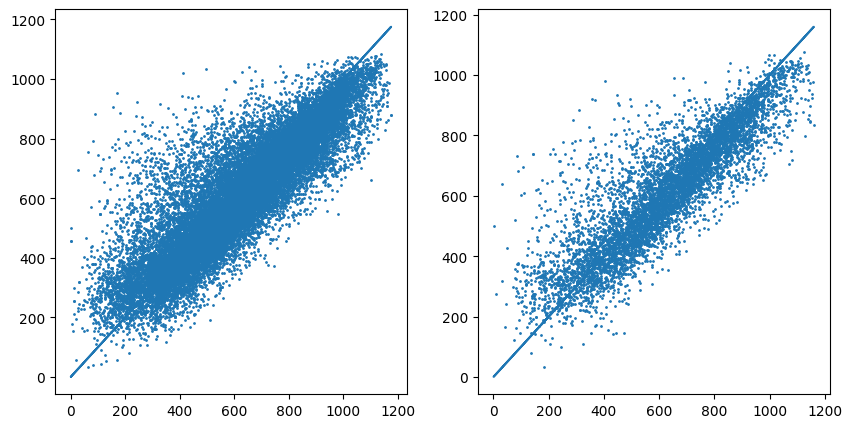

In [26]:
fig,ax = plt.subplots(1,2, figsize=[10,5])

ax[0].scatter(ytrain, ypred_train, s=1)
ax[0].plot(ytrain, ytrain, linestyle='solid')


# Calculate the point density
ax[1].scatter(ytest,ypred_test, s=1)
ax[1].plot(ytest, ytest, linestyle='solid')

rmse = np.sqrt(np.mean((ytest-ypred_test)**2))
print(rmse)